# Binary Classification

# Multi-class Classification
    - One vs. One
    - One vs. All
    - SoftMax

In [1]:
# imports

# from PreprocessData import IrisDataset
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
import random

In [2]:
class IrisDataset():
    def __init__(self, change_to_binary_classed_data='binary', remove_class='Iris-versicolor', remove_features=True, normalization_method='none'):
        
        self.normalization_method = normalization_method
        self.dataset_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
        self.sep = ','
        self.coloumn_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
        self.class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
        self.class_names.remove(remove_class)
        
        # read data using pandas
        self.data_frame = pd.read_csv(self.dataset_link, sep=self.sep, names=self.coloumn_names)
        
        
        if change_to_binary_classed_data == 'binary':
            self.TwoClassIris(remove_class, remove_features)
        elif change_to_binary_classed_data == 'one_vs_all':
            self.TwoClassIrisOneVSAll(remove_class)
        elif change_to_binary_classed_data == 'multiclass':
            self.ThreeClassIris()

    def ThreeClassIris(self):
        self.data_frame['class'].replace({'Iris-setosa': 0., 'Iris-versicolor': 1., 'Iris-virginica': 2.}, inplace=True)
        self.num_of_features = 4
        
        # slpitting into train and test
        # train set : 80%
        # test set : 20%
        self.data_frame = shuffle(self.data_frame)
        
        self.x_train_size = int(len(self.data_frame) * 0.8)
        self.x_test_size = len(self.data_frame) - self.x_train_size
        
        self.x_train_without_x0 = self.data_frame.head(self.x_train_size)
        self.x_test_without_x0 = self.data_frame.tail(self.x_test_size)
        
        # remove self.data_frame to avoid storing data too much
        del self.data_frame
        
        # remove class labels from x_train & x_test
        # convert to numpy
        self.y_train = self.x_train_without_x0['class'].to_numpy(dtype='float64').reshape(self.x_train_size, 1)
        self.y_test = self.x_test_without_x0['class'].to_numpy(dtype='float64').reshape(self.x_test_size, 1)

        self.x_train_without_x0 = self.x_train_without_x0.drop('class', axis=1).to_numpy(dtype='float64').reshape(self.x_train_size, self.num_of_features)
        self.x_test_without_x0 = self.x_test_without_x0.drop('class', axis=1).to_numpy(dtype='float64').reshape(self.x_test_size, self.num_of_features)
        
        # Normalize data
        # Add vector x-0 to first of x_train & x_test
        self.normalize(self.normalization_method)
        self.x_train, self.x_test = self.add_vector_x0()
    
    
    def TwoClassIris(self, remove_class, remove_features):
        self.num_of_features = 4
        if remove_features == True:
            self.data_frame.drop(['petal length', 'petal width'], axis=1, inplace=True)
            self.num_of_features = 2
        
        self.data_frame = self.data_frame[self.data_frame['class'] != remove_class]
        self.data_frame['class'].replace({self.class_names[0]: 0., self.class_names[1]: 1.}, inplace=True)
        
        # split 80%-20% of whole data randomly
        # slpitting into train and test
        # train set : 80%
        # test set : 20%
        self.data_frame = shuffle(self.data_frame)
        
        self.x_train_size = int(len(self.data_frame) * 0.8)
        self.x_test_size = len(self.data_frame) - self.x_train_size
        
        self.x_train_without_x0 = self.data_frame.head(self.x_train_size)
        self.x_test_without_x0 = self.data_frame.tail(self.x_test_size)
        
        # ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.
        
        # remove class labels from x_train & x_test
        # convert to numpy
        self.y_train = self.x_train_without_x0['class'].to_numpy(dtype='float64').reshape(self.x_train_size, 1)
        self.y_test = self.x_test_without_x0['class'].to_numpy(dtype='float64').reshape(self.x_test_size, 1)

        self.x_train_without_x0 = self.x_train_without_x0.drop(['class'], axis=1).to_numpy(dtype='float64').reshape(self.x_train_size, self.num_of_features)
        self.x_test_without_x0 = self.x_test_without_x0.drop(['class'], axis=1).to_numpy(dtype='float64').reshape(self.x_test_size, self.num_of_features)
        
        # remove self.data_frame to avoid storing data too much
        del self.data_frame
        
        # Normalize data
        # Add vector x-0 to first of x_train & x_test
        self.normalize(self.normalization_method)
        self.x_train, self.x_test = self.add_vector_x0()
    
    def TwoClassIrisOneVSAll(self, one_class):
        self.num_of_features = 4
                
        other_class = [class_n for class_n in self.class_names if class_n != one_class]
        self.data_frame['class'].replace({one_class: 1., other_class[0]: 0., other_class[1]: 0.}, inplace=True)
        
        # split 80%-20% of whole data randomly
        # slpitting into train and test
        # train set : 80%
        # test set : 20%
        self.data_frame = shuffle(self.data_frame)
        
        self.x_train_size = int(len(self.data_frame) * 0.8)
        self.x_test_size = len(self.data_frame) - self.x_train_size
        
        self.x_train_without_x0 = self.data_frame.head(self.x_train_size)
        self.x_test_without_x0 = self.data_frame.tail(self.x_test_size)
        
        # ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.
        # remove class labels from x_train & x_test
        # convert to numpy
        self.y_train = self.x_train_without_x0['class'].to_numpy(dtype='float64').reshape(self.x_train_size, 1)
        self.y_test = self.x_test_without_x0['class'].to_numpy(dtype='float64').reshape(self.x_test_size, 1)

        self.x_train_without_x0 = self.x_train_without_x0.drop(['class'], axis=1).to_numpy(dtype='float64').reshape(self.x_train_size, self.num_of_features)
        self.x_test_without_x0 = self.x_test_without_x0.drop(['class'], axis=1).to_numpy(dtype='float64').reshape(self.x_test_size, self.num_of_features)
        
        # remove self.data_frame to avoid storing data too much
        del self.data_frame
        
        # Normalize data
        # Add vector x-0 to first of x_train & x_test
        self.normalize(self.normalization_method)
        self.x_train, self.x_test = self.add_vector_x0()
    
    """
    Normalizing data improves the convergence of learning model and causes that smaller features also be able to affect the model parameters.
    """
    def normalize(self, normalization_method):
        if normalization_method == 'none':
            print("No normalization.")
            return
        
        if normalization_method == 'zero_mean_unit_var':
            print("zero-mean & unit_variance normalization.")
            self.x_train_without_x0 = self.zero_mean_unit_variance(self.x_train_without_x0)
            self.x_test_without_x0 = self.zero_mean_unit_variance(self.x_test_without_x0)
            
            
        if normalization_method == 'scale_0_1':
            print("scaling to [0, 1] normalization.")
            self.x_train_without_x0 = self.scaling_between_0_1(self.x_train_without_x0)
            self.x_test_without_x0 = self.scaling_between_0_1(self.x_test_without_x0)

    def scaling_between_0_1(self, numpy_array):
        '''
        Scaling
        '''
        normed_numpy_array = (numpy_array - numpy_array.min(axis=0)) / (numpy_array.max(axis=0) - numpy_array.min(axis=0))
        return normed_numpy_array


    def zero_mean_unit_variance(self, numpy_array):
        '''
        Standardization
        '''
        normed_numpy_array = (numpy_array - numpy_array.mean(axis=0)) / numpy_array.std(axis=0)
        return normed_numpy_array

    def add_vector_x0(self):
        # create a vector of ones for x0 and add to first of x_train & x_test
        # to add x0_vector of ones to coloumns, we should use np.c_
        # to add x0_vector of ones to rows, we should use np.r_
        
        x0_vector_train = np.ones(shape=self.y_train.shape)
        x0_vector_test = np.ones(shape=self.y_test.shape)
        x_train = np.c_[x0_vector_train, self.x_train_without_x0]
        x_test = np.c_[x0_vector_test, self.x_test_without_x0]
        return x_train, x_test

## Binary Classification

In this classification, we only have two classes. Therefore, we need to compute two probabilities of y from first class and y from second class as below:

> $$
P(y=1|X;\theta) = h_{\theta}(X)
\\
P(y=0|X;\theta) = 1 - h_{\theta}(X)
$$

Finally, the Bernouli formulation will be as below:

> $$
P(y|X;\theta) = h_{\theta}(X)^{y} (1 - h_{\theta}(X))^{1-y}
$$

The $h_{\theta}$ here is the hypothesis function  or $P(y=1|X;\theta)$ which is **Sigmoid** function, g(z), of $\theta^{T}X$. The formula is:

> $$
h_{\theta}(X) = g(\theta^{T}X) = \frac {1} {1 + e^{ -\theta^{T}X}}
$$

To find $\theta$-set, we should find the likelihood function and tru to maximize it over some iterations using gradient ascent method. The likelihood function is as below while m is number of samples:

> $$
L(\theta) = \prod \limits _{j=1} ^{m} P(y^{(j)}|X^{(j)};\theta)
\\
= \prod \limits _{j=1} ^{m} h_{\theta}(X^{(j)})^{y^{(j)}} (1 - h_{\theta}(X^{(j)})^{1-y^{(j)}}))
$$

For ease of computations, we find the gradient of $l(\theta)$ which is $\log(L(\theta))$.

> $$
l(\theta) = \log(L(\theta)) = \sum \limits _{j=1} ^{m} y^j log(h_\theta (X^j)) + (1-y^j) log(1 - h_\theta (X^j))
$$

Therefore, the gradient ascent formula for updating $\theta$ in each iteration is as follows:

> $$
\theta_i = \theta_i + \alpha \sum \limits _{j=1} ^{m} (y^{(j)} - h_{\theta}(X^{(j)})) x_{i}^{(j)} 
$$

In [3]:
class BinaryClassifier():
    def __init__(self, hypothesis_fn, cost_fn='cross_entropy', alpha=1e-5, max_iter=20000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.hypothesis_fn = hypothesis_fn
        self.cost_fn = cost_fn
        self.cost = []
        self.likelihood = []
    
    def h_theta(self, x):
        '''
        x         -> shape: (m, n)
        theta     -> shape: (n, 1)
        prob      -> shape: (m, 1)
        
        probability = sigmoid(theta*x)
        prob      -> shows the probability of each x[j] be from class 1
        1 - prob  -> shows the probability of each x[j] be from class 0
        '''
        prob = self.hypothesis_fn(np.matmul(x, self.theta))
        return prob
    
    def likelihood_fn(self, y_hat, y):
        # print("y_hat", y_hat)
        # l = np.mean((y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
        eps=1e-8
        y_hat[y_hat==0] += eps
        y_hat[y_hat==1] -= eps
        l = np.sum((y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
        return l
    
    def gradient_of_likelihood(self, x, y_hat, y):
        '''
        x         -> shape: (m, n)
        y         -> shape: (m, 1)
        y_hat     -> shape: (m, 1)
        delta_l   -> shape: (n, 1)
        '''
        delta_l = np.mean(np.matmul(x.T, (y - y_hat)), axis=1)
        return delta_l.reshape(x.shape[1], 1)                     # change shape of delta-l to vertical vector
    
    # mean square error using probability
    def mse(self, y_hat, y):
        return np.mean(np.square(y_hat - y))

    # mean square error using y_hat_label
    def mse_1(self, y_hat_label, y):
        return np.mean(np.square(y_hat_label - y))
    
    # cross-entropy cost
    def cross_entropy_cost(self, y_hat, y):
        return np.mean(-np.sum(y * np.log(y_hat), axis = 1))
    
    def fit(self, x, y, eps = 1e-8):
        self.num_of_samples = x.shape[0]
        self.num_of_features = x.shape[1]
        
        # zero initialize theta
        self.theta = np.zeros((x.shape[1], 1))
        # random initialize theta    
#         self.theta = np.random.rand(x.shape[1], 1)
        is_converged_earlier = False
        for i in range(self.max_iter):
            y_hat = self.h_theta(x)
            
            # update theta
            gradient_l_theta = self.gradient_of_likelihood(x, y_hat, y)

            self.theta += self.alpha * gradient_l_theta
            
            # add likelihood amount to array
            likelihood_value = self.likelihood_fn(y_hat, y)
            self.likelihood.append(likelihood_value)
            
            # add cost amount to array
            if self.cost_fn == 'cross_entropy':
                cost_value = self.cross_entropy_cost(y_hat, y)
                new_cost = self.cross_entropy_cost(self.h_theta(x), y)
            elif self.cost_fn == 'mse':
                cost_value = self.mse(y_hat, y)
                new_cost = self.mse(self.h_theta(x), y)
            elif self.cost_fn == 'mse_1':
                cost_value = self.mse(self.predict(x), y)
                new_cost = self.mse(self.predict(x), y)
            self.cost.append(cost_value)

            diff = abs(cost_value - new_cost)
            if diff < eps:
                is_converged_earlier = True
                self.convergence_iteration = i
                break
                
            # print likelihood value each 5000 iteration
#             if i % 500 == 0:
#                 print(f'likelihood in iteration {i}: {self.likelihood[-1]}')
        if is_converged_earlier == False:
            self.convergence_iteration = self.max_iter
        print('Iteration', i, 'with difference', diff, 'converged.')
        return self.theta

    def predict(self, x):
        prob = self.h_theta(x)                        # shape: (m, 1)
        predicted_label = []
        # find class based on probability
        for i in range(0,len(prob)):
            if (prob[i] >= 0.5): 
                predicted_label.append(1)
            elif (prob[i] < 0.5):
                predicted_label.append(0)
        
        return np.asanyarray(predicted_label).reshape(-1,1)         # shape: (m,1)

    def report(self, x_train, y_train, x_test, y_test):
        '''
        x_train is ndarray(m,n)
        y_train is ndarray(m,1)           
        x_test is ndarray(m,n)
        y_test is ndarray(m,1)           
        '''
        self.decision_boundary_m = -self.theta[1][0]/self.theta[2][0]
        self.decision_boundary_c = -self.theta[0][0]/self.theta[2][0]

        y_hat_train = self.h_theta(x_train)
        y_hat_test = self.h_theta(x_test)
        for i in range(len(self.theta)):
            print('theta_',i, ': ', self.theta[i][0])
        if self.cost_fn == 'cross_entropy':
            print('Cross-Entropy on data train: ', self.cross_entropy_cost(y_hat_train, y_train))
            print('Cross-Entropy on data test: ', self.cross_entropy_cost(y_hat_test, y_test))
        elif self.cost_fn == 'mse':
            print('MSE on data train: ', self.mse(y_hat_train, y_train))
            print('MSE on data test: ', self.mse(y_hat_test, y_test))
            
        print('Accuracy metric on data train: ', self.accuracy_metric(self.predict(x_train), y_train))
        print('Accuracy metric on data test: ', self.accuracy_metric(self.predict(x_test), y_test))
        
        print(f'Decision Boundary Euqation: y = {round(self.decision_boundary_m, 2)}*x + {round(self.decision_boundary_c, 2)}')
     
    def get_cost(self):
        return self.cost
    
    def accuracy_metric(self, y_hat, y):
        return (np.mean(y_hat == y))*100.0
    
    def decision_boundary(self, x):
        '''
        y = mx + c
        c = -b/w2
        m = -w1/w2
        
        here:
        b->theta[0]
        w1->theta[1]
        w2->theta[2]
        '''
        return -(self.theta[0][0] + np.dot(self.theta[1][0], x)) / self.theta[2][0]
    
    def plot(self, X, Y, title ,label=None):
        
        x = pd.DataFrame(data=X, columns=["col-1", "col-2"])
        y = pd.DataFrame(data=Y, columns=["class"])

        res = pd.concat([x, y], axis=1, sort=False)
        class_0 = res[res['class'] == 0]
        class_1 = res[res['class'] == 1]

        plt.scatter(class_0.iloc[:,0], class_0.iloc[:, 1], s=10, label='class-0')
        plt.scatter(class_1.iloc[:,0], class_1.iloc[:, 1], s=10, label='class-1')
        
        x = np.array([np.min(x.iloc[:, 0]), np.max(x.iloc[:, 0])])
        y = self.decision_boundary(x)
        plt.plot(x, y, label='decision boundary', color='pink')

        plt.legend()
        plt.show()
        return
    
    def plot_cost(self, label='cross_entropy'):
        plt.figure()
        plt.plot(self.cost, label=label)
        plt.legend(title=label)
        plt.show()
        return
    
    def plot_likelihood(self):
        plt.figure()
        plt.title = "likelihood"
        plt.plot(self.likelihood, label='likelihood')
        plt.legend(title='likelihood')
        plt.show()
        return


No normalization.
Iteration 1693 with difference 9.990042966277757e-06 converged.


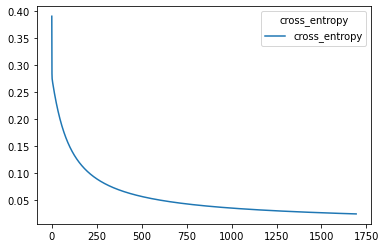

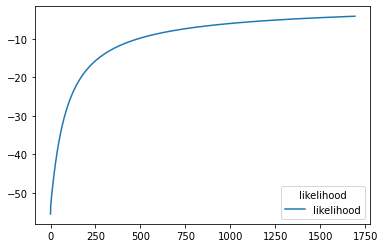

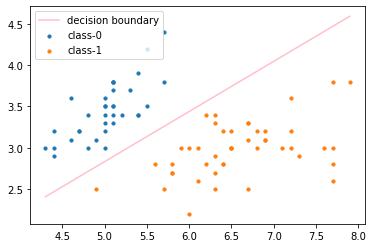

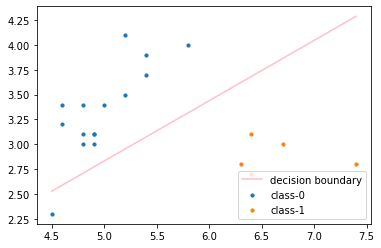

theta_ 0 :  -1.104665482877918
theta_ 1 :  3.360533989260954
theta_ 2 :  -5.542236284659719
Cross-Entropy on data train:  0.02412889084760611
Cross-Entropy on data test:  0.0031279987750110864
Accuracy metric on data train:  100.0
Accuracy metric on data test:  95.0
Decision Boundary Euqation: y = 0.61*x + -0.2


array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [4]:
def sigmoid(z):
    y = 1/(1 + np.exp(-z))
    return y

iris_dataset = IrisDataset(change_to_binary_classed_data='binary',remove_class='Iris-versicolor', remove_features=True, normalization_method='none')

binary_classifier = BinaryClassifier(hypothesis_fn=sigmoid, cost_fn='cross_entropy', alpha=1e-3, max_iter=30000)

# mse_1 -> mse using y-labels
# not good -> because in first iteration -> it converges with diffrence 0.0 while not findin right thetas yet.
# binary_classifier = BinaryClassifier(hypothesis_fn=sigmoid, cost_fn='mse_1', alpha=1e-3, max_iter=30000) 

binary_classifier.fit(iris_dataset.x_train, iris_dataset.y_train, eps=1e-5)

binary_classifier.plot_cost(label='cross_entropy')
binary_classifier.plot_likelihood()

binary_classifier.plot(iris_dataset.x_train_without_x0, iris_dataset.y_train, iris_dataset.x_train, "train")
binary_classifier.plot(iris_dataset.x_test_without_x0, iris_dataset.y_test, iris_dataset.x_test, "test")

binary_classifier.report(iris_dataset.x_train, iris_dataset.y_train, iris_dataset.x_test, iris_dataset.y_test)

# print(iris_dataset.y_test)
binary_classifier.predict(iris_dataset.x_test)


## Multi-class Classification using *one vs. one* & *one vs. all*

### one vs. one method:

The one-vs-one approach splits the dataset into one dataset for each class versus every other class.


So the number of datasets to create in this method is:
> $$ NumDatasets = \frac {NumClasses * (NumClasses – 1)} {2}$$

In this project, sinc we're working with iris-dataset, it has 3 class-labels. So, the number of datasets to create is 3.


After preparing these 3 datasets, we train 3 binary classification models with each dataset.


To predict class of $X^j$ using one vs. one method:
* Predict if it is class-0 or class-1 in each of binary classifiers.
* Add 1 to number of samples of predicted class in each binary classifier.
* Predict the class which has max number of predictions as the class of $X^j$.

### one vs. all method:

The one-vs-all approach splits the dataset into one dataset for each class versus the 2 other classes.


So the number of datasets to create in this method is:
> $$ NumDatasets = NumClasses $$

In this project, sinc we're working with iris-dataset, it has 3 class-labels. So, the number of datasets to create is 3.


After preparing these 3 datasets, we train 3 binary classification models with each dataset.


To predict class of $X^j$ using one vs. all method:
* Predict the probability of being from each class versus the two other classes using binary classifiers.
* Predict the class which has max probability as the class of $X^j$.


In [5]:
def sigmoid(z):
    y = 1/(1 + np.exp(-z))
    return y

class MulticlassClassificationLogisticRegression():
    
    def fit(self, method= 'one_vs_one', normalization_method='none', cost_fn='cross_entropy', alpha=1e-3, max_iter=30000, eps=1e-8):
        self.method = method
        self.cost_fn = cost_fn
        self.max_iter = max_iter
        self.alpha = alpha
        self.epsilon = eps 
        if self.method == 'one_vs_one':
            self.prepare_data('one_vs_one', normalization_method=normalization_method)
            self.train()
            
        elif self.method == 'one_vs_all':
            self.prepare_data('one_vs_all', normalization_method=normalization_method)
            self.train()
    
    def accuracy_metric(self, y_hat, y):
        return (np.mean(y_hat == y))*100.0
    
    def plot_cost(self):
        class_1 = self.binary_classifier_1.get_cost()
        class_2 = self.binary_classifier_2.get_cost()
        class_3 = self.binary_classifier_3.get_cost()
        len_min = min(len(class_1), len(class_2), len(class_3))
        costall = np.c_[class_1[:len_min], class_2[:len_min], class_3[:len_min]]
        cost_model = np.mean(costall, axis=1)
        plt.plot(list(range(len_min)), cost_model, color='Blue', label='cost')
        plt.legend()
        plt.show()
        return
            
    def report(self, x_train, y_train, x_test, y_test):
        '''
        x_train is ndarray(m,n)
        y_train is ndarray(m,1)          
        x_test is ndarray(m,n)
        y_test is ndarray(m,1)            
        '''
        mean_iter = np.mean([self.binary_classifier_1.convergence_iteration, 
                            self.binary_classifier_2.convergence_iteration,
                            self.binary_classifier_3.convergence_iteration])
        print('Mean Convergence iteration ', mean_iter)
        if self.method == 'one_vs_one':
            print("Accuracy on data train: ", self.accuracy_metric(self.predict_one_vs_one(x_train), y_train))
            print("Accuracy on data test: ", self.accuracy_metric(self.predict_one_vs_one(x_test), y_test))
        if self.method == 'one_vs_all':
            print("Accuracy on data train: ", self.accuracy_metric(self.predict_one_vs_all(x_train), y_train))
            print("Accuracy on data test: ", self.accuracy_metric(self.predict_one_vs_all(x_test), y_test))
    
    def prepare_data(self, classifer='one_vs_one', normalization_method='none'):

        if classifer == 'one_vs_one':
            # Iris-versicolor -> class 0 | Iris-virginica -> class 1
            self.iris_dataset_1 = IrisDataset(change_to_binary_classed_data='binary', remove_class='Iris-setosa', remove_features=False, normalization_method=normalization_method)      
            # Iris-setosa -> class 0     | Iris-virginica -> class 1
            self.iris_dataset_2 = IrisDataset(change_to_binary_classed_data='binary', remove_class='Iris-versicolor', remove_features=False, normalization_method=normalization_method)  
            # Iris-setosa -> class 0     | Iris-versicolor -> class 1
            self.iris_dataset_3 = IrisDataset(change_to_binary_classed_data='binary', remove_class='Iris-virginica', remove_features=False, normalization_method=normalization_method)   
        
        elif classifer == 'one_vs_all':
            # Two other -> class 0 | Iris-setosa -> class 1
            self.iris_dataset_1 = IrisDataset(change_to_binary_classed_data='one_vs_all', remove_class='Iris-setosa', remove_features=False, normalization_method=normalization_method)      
            # Two other -> class 0 | Iris-versicolor -> class 1
            self.iris_dataset_2 = IrisDataset(change_to_binary_classed_data='one_vs_all', remove_class='Iris-versicolor', remove_features=False, normalization_method=normalization_method)  
            # Two other -> class 0 | Iris-virginica -> class 1
            self.iris_dataset_3 = IrisDataset(change_to_binary_classed_data='one_vs_all', remove_class='Iris-virginica', remove_features=False, normalization_method=normalization_method)   
    
    def train(self):
        # create three binary classification model
        print("Creating binary classifiers...")
        self.binary_classifier_1 = BinaryClassifier(hypothesis_fn=sigmoid, cost_fn=self.cost_fn, alpha=self.alpha, max_iter=self.max_iter)
        self.binary_classifier_2 = BinaryClassifier(hypothesis_fn=sigmoid, cost_fn=self.cost_fn, alpha=self.alpha, max_iter=self.max_iter)
        self.binary_classifier_3 = BinaryClassifier(hypothesis_fn=sigmoid, cost_fn=self.cost_fn, alpha=self.alpha, max_iter=self.max_iter)
        
        # train each model with each of the datasets created in prepare_data_4_one_vs_one() function to get 3 theta-set
        print("Training binary classifiers...")
        self.binary_classifier_1.fit(self.iris_dataset_1.x_train, self.iris_dataset_1.y_train, eps=self.epsilon)
        self.binary_classifier_2.fit(self.iris_dataset_2.x_train, self.iris_dataset_2.y_train, eps=self.epsilon)
        self.binary_classifier_3.fit(self.iris_dataset_3.x_train, self.iris_dataset_3.y_train, eps=self.epsilon)

    def predict_one_vs_one(self, x):
        predicted_labels = []
        for i in range(len(x)):
            no_from_each_class = [0, 0, 0]
            label1 = self.binary_classifier_1.predict(x[i])
            label2 = self.binary_classifier_2.predict(x[i])
            label3 = self.binary_classifier_3.predict(x[i])
            
            if label1 == 1:
                no_from_each_class[2] += 1
            else:
                no_from_each_class[1] += 1
            
            if label2 == 1:
                no_from_each_class[2] += 1
            else:
                no_from_each_class[0] += 1
            
            if label3 == 1:
                no_from_each_class[1] += 1
            else:
                no_from_each_class[0] += 1
            predicted_labels.append(no_from_each_class.index(max(no_from_each_class)))
#         return np.array([label.index(max(label)) for label in predicted_labels]).reshape(-1,1)
        return np.array(predicted_labels).reshape(-1, 1)
    
    def predict_one_vs_all(self, x):        
        prob1 = self.binary_classifier_1.h_theta(x)          # shape: (m, 1)
        prob2 = self.binary_classifier_2.h_theta(x)          # shape: (m, 1)
        prob3 = self.binary_classifier_3.h_theta(x)          # shape: (m, 1)
        
        probAll = np.c_[prob1, prob2, prob3]                 # shape: (m, 3)
        return np.argmax(probAll, axis =1).reshape(-1,1)     # shape: (m, 1)
                

### Multi-class Classifier, 'One vs. One'

No normalization.
No normalization.
No normalization.
No normalization.
Creating binary classifiers...
Training binary classifiers...
Iteration 9523 with difference 9.99926206765589e-07 converged.
Iteration 1375 with difference 9.987447717411252e-07 converged.
Iteration 2068 with difference 9.99448089857545e-07 converged.
Mean Convergence iteration  4322.0
Accuracy on data train:  97.5
Accuracy on data test:  96.66666666666667


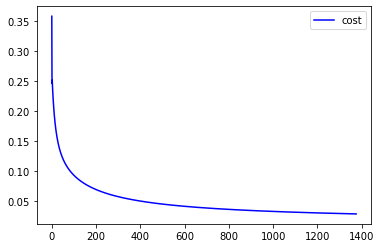

In [14]:
iris_dataset = IrisDataset(change_to_binary_classed_data='multiclass', normalization_method='none')

multinomial_classifier = MulticlassClassificationLogisticRegression()
multinomial_classifier.fit(method='one_vs_one', normalization_method='none', cost_fn='cross_entropy',
                                       alpha=1e-3, max_iter=50000, eps=1e-6)

multinomial_classifier.predict_one_vs_one(iris_dataset.x_train)
multinomial_classifier.predict_one_vs_one(iris_dataset.x_test)

multinomial_classifier.report(iris_dataset.x_train, iris_dataset.y_train, iris_dataset.x_test, iris_dataset.y_test)

multinomial_classifier.plot_cost()

### Multi-class Classifier, 'One vs. All'

No normalization.
No normalization.
No normalization.
No normalization.
Creating binary classifiers...
Training binary classifiers...
Iteration 1831 with difference 9.991227877524135e-07 converged.
Iteration 7827 with difference 9.998669584510012e-07 converged.
Iteration 6804 with difference 9.99943951626725e-07 converged.
Mean Convergence iteration  5487.333333333333
Accuracy on data train:  95.83333333333334
Accuracy on data test:  96.66666666666667


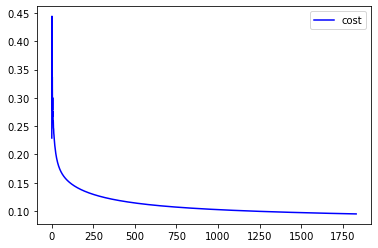

In [7]:
iris_dataset = IrisDataset(change_to_binary_classed_data='multiclass', normalization_method='none')

multinomial_classifier = MulticlassClassificationLogisticRegression()
multinomial_classifier.fit(method='one_vs_all' , normalization_method='none', cost_fn="cross_entropy",
                                       alpha=1e-3, max_iter=50000, eps=1e-6)

multinomial_classifier.predict_one_vs_all(iris_dataset.x_train)
multinomial_classifier.predict_one_vs_all(iris_dataset.x_test)

multinomial_classifier.report(iris_dataset.x_train, iris_dataset.y_train, iris_dataset.x_test, iris_dataset.y_test)

multinomial_classifier.plot_cost()

## Multi-class Classification using Sotfmax

Since we have, in general, k classes, our predictor variable follows a multinomial distribution, that is, 
$y \in \{ 1, 2, \ldots, k \}$.
To decide on parameters, we could choose k parameters $\phi_1, \phi_2, \ldots, \phi_k$. 
For our multinomial model we have:


> $$
P(y = 1|X; \theta) = \phi_1 
\\
P(y = 2|X; \theta) = \phi_2 
\\
\vdots 
\\
P(y = k|X; \theta) = \phi_k 
$$

such that
$
\sum_{i = 1}^k \phi_k = 1
$.

Substituting this in generalized linear model we have:

>$$
\phi_i = \frac{e^{\eta_i}}{\sum_{l=1}^k e^{\eta_l}}          (i = 1, · · · , k)
$$

we assumed that 
$
\eta_i = \theta_i^T x \ \ \ \ \ \forall i = 1, 2, \ldots, k 
$

Each of these $\theta_i$s is a vector of (n+1) dimensions. And thus, our final softmax regression model is
>$$
P(y=i |x;\theta) = \frac{e^{\theta_i^T x}}{\sum_{l=1}^k e^{\theta_l^T x}} = \phi_i
$$


To find the optimal values of $\theta$ to fit the data, we use the technique of maximum likelihood estimation. As always, we’ll start with the log-likelihood function. Here, we’ll just directly write it down without writing the likelihood first.

>$$ \ell(\theta) = \sum_{i=1}^m \log P\left( y^{(i)}|x^{(i)};\theta \right) 
\\ 
= \sum_{i=1}^m \log \prod_{j=1}^k \left( \frac{e^{\theta_j^T x^{(i)}}}{\sum_{l=1}^k e^{\theta_l^T x^{(i)}}} \right)^{1\{y^{(i)} = j\}} 
\\ = \sum_{i=1}^m \sum_{j=1}^k \log \left( \frac{e^{\theta_j^T x^{(i)}}}{\sum_{l=1}^k e^{\theta_l^T x^{(i)}}} \right)^{1\{y^{(i)} = j\}}  = \sum_{i=1}^m \sum_{j=1}^k \log (\phi_j)^{1\{y^{(i)} = j\}} 
$$

To find the derivative of this, let’s first find the derivative of the softmax function w.r.t $\phi$.

>$$
\frac{\partial}{\partial \theta_p} \left( \phi_j \right)  =
\frac{\partial}{\partial \theta_p} \left( \frac{e^{\theta^T_j x^{(i)}}}{\sum_{l=1}^k e^{\theta^T_l x^{(i)}}} \right)  
= \phi_j({1\{p = j\}} -\phi_p)x^{(i)}
$$

If you look at the log-likelihood function again and adding summation and logarithem to the derivation we have: 

>$$
\frac{\partial}{\partial \theta_p} \left( \sum_{j=1}^k \log (\phi_j)^{1\{y^{(i)} = j\}} \right) 
= \left( {1\{y^{(i)} = p\}} - \phi_p \right)x^{(i)}
$$


And finally, computing the gradient of the log-likelihood function,

>$$ \frac{\partial}{\partial \theta_p} \ell(\theta) = \frac{\partial}{\partial \theta_p} \left( \sum_{i=1}^m \sum_{j=1}^k \log (\phi_j)^ {1\{y^{(i)} = j\}} \right) 
= \sum_{i=1}^m ( {1\{y^{(i)} = p\}} - \phi_p) x^{(i)} 
$$

Use gradient ascent $θ = θ + α∇_\theta \ell(θ)$ we have:

>$$
\theta_p = \theta_p + \alpha \sum_{i=1}^m ( {1\{y^{(i)} = p\}} - \phi_p) x^{(i)} 
$$

In [8]:
class SoftmaxLogisticRegression:
    def fit(self, X, y, alpha=1e-5, n_iter=20000, eps = 1e-8, cost_func='cross_entropy'):
        '''
        X is ndarray(m,n)
        y is ndarray(m,1)
        return theta as ndarray(c,n)
        '''
        self.max_iter = n_iter
        self.cost_func = cost_func
        self.classes = np.unique(y)
        c = len(self.classes)
        m = X.shape[0]
        n = X.shape[1]        
        
        self.theta = np.zeros((c, n))
        self.cost = []
        
        y_one_hot = self.one_hot(y)
                        
        is_converged_earlier = False
        print('Training softmax classifier...')
        for i in range(n_iter):
            y_hat = self.phi(X)
            y_hat_label = self.predict(X)
            
            error = y_one_hot - y_hat
            self.theta += alpha * (np.matmul(error.T, X))
            
            if cost_func == 'cross_entropy':
                # Cross Entropy cost
                cost_value = self.cross_entropy_cost(y_hat, y_one_hot)
                new_cost = self.cross_entropy_cost(self.phi(X) , y_one_hot)
                
            elif cost_func == 'mse':
                # MSE cost
                cost_value = self.mse(y_hat_label, y)
                new_cost = self.mse(self.predict(X), y)
            
            self.cost.append(cost_value)   
                             
            diff = abs(cost_value - new_cost)
            if diff < eps:
                is_converged_earlier = True
                self.convergence_iteration = i
                break
                
        if is_converged_earlier == False:
            self.convergence_iteration = self.max_iter
        print('Iteration', i, 'with difference', diff, 'converged.')
        
        return self.theta
        
    def one_hot(self, y):
        '''
        y is ndarray(m,1)
        return y_one_hot as ndarray(m,c)
        '''        
        c = len(self.classes)
        m = y.shape[0]
        y_one_hot = np.zeros((m, c))
        
        for i, row in enumerate(y):
            y_one_hot[i][int(row[0])] = 1
            
        return y_one_hot

    def phi(self, X):
        '''
        X is ndarray(m,n)
        return probabilty as ndarray(m,c)
        '''
        return self.softmax(np.matmul(X, self.theta.T))

    def softmax(self, z):
        '''
        z is ndarray(m,c)
        return probabilty as ndarray(m,c)
        '''
        return np.exp(z)/ np.sum(np.exp(z), axis = 1).reshape(-1,1)
    
    def predict(self, X):
        '''
        X is ndarray(m,n)
        return y_hat_label as ndarray(m,1)
        '''
        return (np.argmax(self.phi(X), axis =1)).reshape(-1,1)
    
    def accuracy_metric(self, X ,y):
        '''
        X is ndarray(m,n)
        y is ndarrat(m,1)
        return accuracy of prediction as scaler
        '''
        return np.mean(self.predict(X) == y)*100.0
    
    def mse(self, y_pred, y): 
        '''
        y_pred & y are ndarray(m,1)
        return loss as scaler
        '''
        return np.mean(np.square(y_pred - y))
    
    def cross_entropy_cost(self, y_pred, y):
        '''
        y_pred & y are ndarray(m,c)
        return loss as scaler
        '''
        return np.mean(-np.sum(y * np.log(y_pred), axis = 1))
    
    def report(self, x_train, y_train, x_test, y_test):
        '''
        x_train is ndarray(m,n)
        y_train is ndarray(m,1)           
        x_test is ndarray(m,n)
        y_test is ndarray(m,1)           
        '''
        
        y_hat_train = self.phi(x_train)
        y_hat_test = self.phi(x_test)
        
        
        y_hat_train_label = self.predict(x_train)
        y_hat_test_label = self.predict(x_test)
        
        print('\n')
        
        print('Accuracy metric on data train: ', self.accuracy_metric(x_train, y_train))
        print('Accuracy metric on data test: ', self.accuracy_metric(x_test, y_test))
        
           
        if self.cost_func == 'cross_entropy':
            print('Cross-Entropy on data train: ', self.cross_entropy_cost(y_hat_train, y_train))
            print('Cross-Entropy on data test: ', self.cross_entropy_cost(y_hat_test, y_test))
        elif self.cost_func == 'mse':
            print('MSE on data train: ', self.mse(y_hat_train_label, y_train))
            print('MSE on data test: ', self.mse(y_hat_test_label, y_test))
            
             
        print('\n')
        for c in range(len(self.classes)): 
            print('theta for class ',c, ':')
            for i in range(len(self.theta[c])):
                print('    theta_',i, ': ', self.theta[c][i])
         
    
    def get_cost(self):
        return self.cost
    
    def plot_cost(self):
        plt.figure()
        plt.plot(self.cost, label=self.cost_func)
        plt.legend(title=self.cost_func)
        plt.show()
        return

No normalization.
Training softmax classifier...
Iteration 6388 with difference 9.99973405249599e-06 converged.


Accuracy metric on data train:  97.5
Accuracy metric on data test:  100.0
Cross-Entropy on data train:  9.60495667654377
Cross-Entropy on data test:  13.01140033305158


theta for class  0 :
    theta_ 0 :  0.38330706308346296
    theta_ 1 :  0.7976965494060386
    theta_ 2 :  1.8438616554432332
    theta_ 3 :  -2.561180667563688
    theta_ 4 :  -1.2102477475631386
theta for class  1 :
    theta_ 0 :  0.5926924710092222
    theta_ 1 :  0.6385114617909009
    theta_ 2 :  -0.3013896840555312
    theta_ 3 :  -0.07602440053495946
    theta_ 4 :  -0.8509893509291806
theta for class  2 :
    theta_ 0 :  -0.9759995340926865
    theta_ 1 :  -1.436208011196947
    theta_ 2 :  -1.5424719713876989
    theta_ 3 :  2.637205068098649
    theta_ 4 :  2.0612370984923127


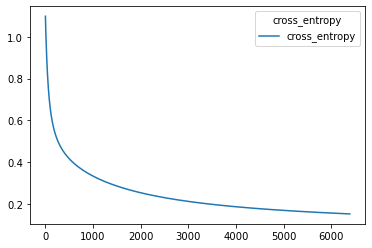

In [13]:
iris_dataset = IrisDataset(change_to_binary_classed_data='multiclass', normalization_method='none')

softmax_classifier = SoftmaxLogisticRegression()
softmax_classifier.fit(iris_dataset.x_train, iris_dataset.y_train,
                    n_iter= 20000, alpha = 1e-4, eps=1e-5, cost_func='cross_entropy')

softmax_classifier.predict(iris_dataset.x_test)

softmax_classifier.report(iris_dataset.x_train, iris_dataset.y_train,iris_dataset.x_test, iris_dataset.y_test)
softmax_classifier.plot_cost()
